<a href="https://colab.research.google.com/github/yeeshuen02/Bank-Customer-Churning/blob/main/Electric_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
suppressPackageStartupMessages(library(tidyverse))
library(tidyverse)

data <- read_csv("ElectricCarData_Norm.csv", show_col_types = FALSE)

ERROR: ignored

In [ ]:
head(data, 5) %>%
  print(width=Inf)

# A tibble: 5 × 14
  Brand      Model                         Accel    TopSpeed Range  Efficiency
  <chr>      <chr>                         <chr>    <chr>    <chr>  <chr>     
1 Tesla      Model 3 Long Range Dual Motor 4.6 sec  233 km/h 450 km 161 Wh/km 
2 Volkswagen ID.3 Pure                     10.0 sec 160 km/h 270 km 167 Wh/km 
3 Polestar   2                             4.7 sec  210 km/h 400 km 181 Wh/km 
4 BMW        iX3                           6.8 sec  180 km/h 360 km 206 Wh/km 
5 Honda      e                             9.5 sec  145 km/h 170 km 168 Wh/km 
  FastCharge RapidCharge             PowerTrain       PlugType   BodyStyle
  <chr>      <chr>                   <chr>            <chr>      <chr>    
1 940 km/h   Rapid charging possible All Wheel Drive  Type 2 CCS Sedan    
2 250 km/h   Rapid charging possible Rear Wheel Drive Type 2 CCS Hatchback
3 620 km/h   Rapid charging possible All Wheel Drive  Type 2 CCS Liftback 
4 560 km/h   Rapid charging possible Rear Wheel Drive

In [ ]:
dim(data)

[1] 103  14

In [ ]:
# Check number of missing values in each variable

# Identify missing values represented as "-"
missing_values <- data == "-"

# Count missing values in each column
missing_counts <- colSums(missing_values)

print(missing_counts)

      Brand       Model       Accel    TopSpeed       Range  Efficiency 
          0           0           0           0           0           0 
 FastCharge RapidCharge  PowerTrain    PlugType   BodyStyle     Segment 
          5           0           0           0           0           0 
      Seats   PriceEuro 
          0           0 


In [ ]:
# Replace missing values with NA
data[data == "-"] <- NA

# Check number of missing values in each variable
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,5
RapidCharge,0
PowerTrain,0


In [ ]:
# Remove rows with missing values
data <- na.omit(data)

In [ ]:
# Make sure that there's no missing data
as.data.frame(colSums(is.na(data)))
dim(data)

,colSums(is.na(data))
,<dbl>
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,0
RapidCharge,0
PowerTrain,0


[1] 98 14

In [ ]:
#converting data from char to numerical
data$Accel <- as.numeric(sub(" sec", "", data$Accel))
data$TopSpeed <- as.numeric(sub(" km/h", "", data$TopSpeed))
data$Range <- as.numeric(sub(" km", "", data$Range))
data$Efficiency <- as.numeric(sub(" Wh/km", "", data$Efficiency))
data$FastCharge <- as.numeric(sub(" km/h", "", data$FastCharge))

NUM_COL <- c('Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro')

In [ ]:
summary(data)

    Brand              Model               Accel           TopSpeed    
 Length:98          Length:98          Min.   : 2.100   Min.   :123.0  
 Class :character   Class :character   1st Qu.: 5.100   1st Qu.:150.0  
 Mode  :character   Mode  :character   Median : 7.300   Median :167.0  
                                       Mean   : 7.047   Mean   :181.7  
                                       3rd Qu.: 8.950   3rd Qu.:200.0  
                                       Max.   :14.000   Max.   :410.0  
     Range         Efficiency      FastCharge    RapidCharge       
 Min.   :170.0   Min.   :104.0   Min.   :170.0   Length:98         
 1st Qu.:258.8   1st Qu.:168.0   1st Qu.:275.0   Class :character  
 Median :350.0   Median :181.0   Median :440.0   Mode  :character  
 Mean   :350.2   Mean   :189.9   Mean   :456.7                     
 3rd Qu.:407.5   3rd Qu.:206.0   3rd Qu.:560.0                     
 Max.   :970.0   Max.   :273.0   Max.   :940.0                     
  PowerTrain        

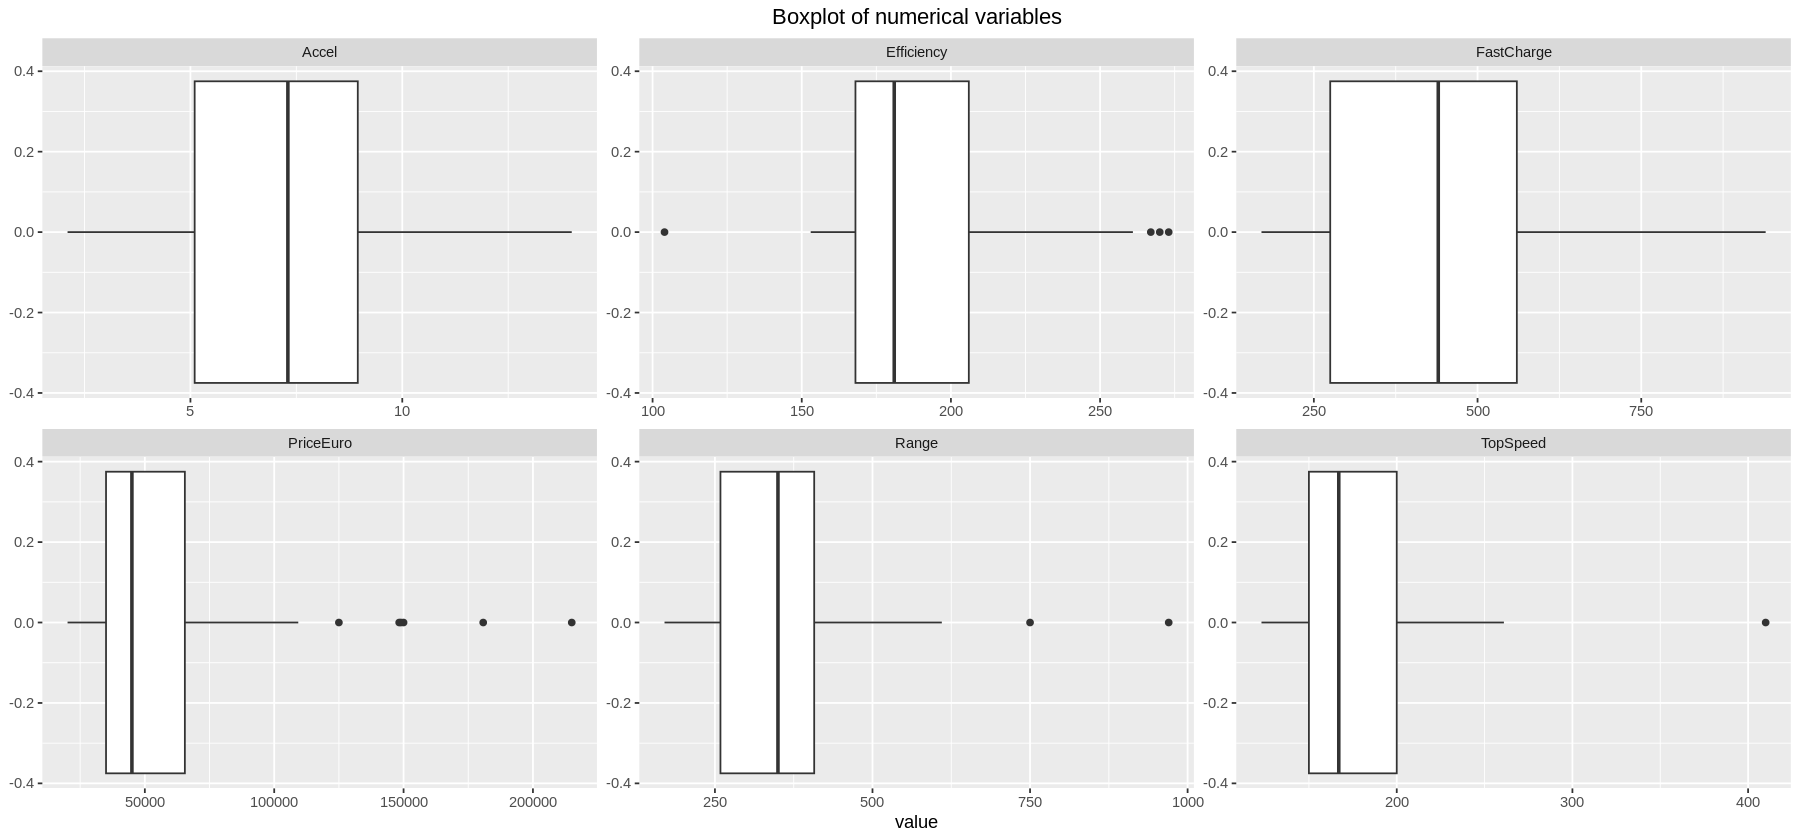

In [ ]:
library(ggplot2)

# Plotting boxplot for numerical columns to check the outliers
ggplot(data=gather(data[NUM_COL]), mapping=aes(value)) +
  geom_boxplot() +
  facet_wrap(~key, scales = 'free') +
  ggtitle("Boxplot of numerical variables") +
  theme(plot.title = element_text(hjust=0.5))

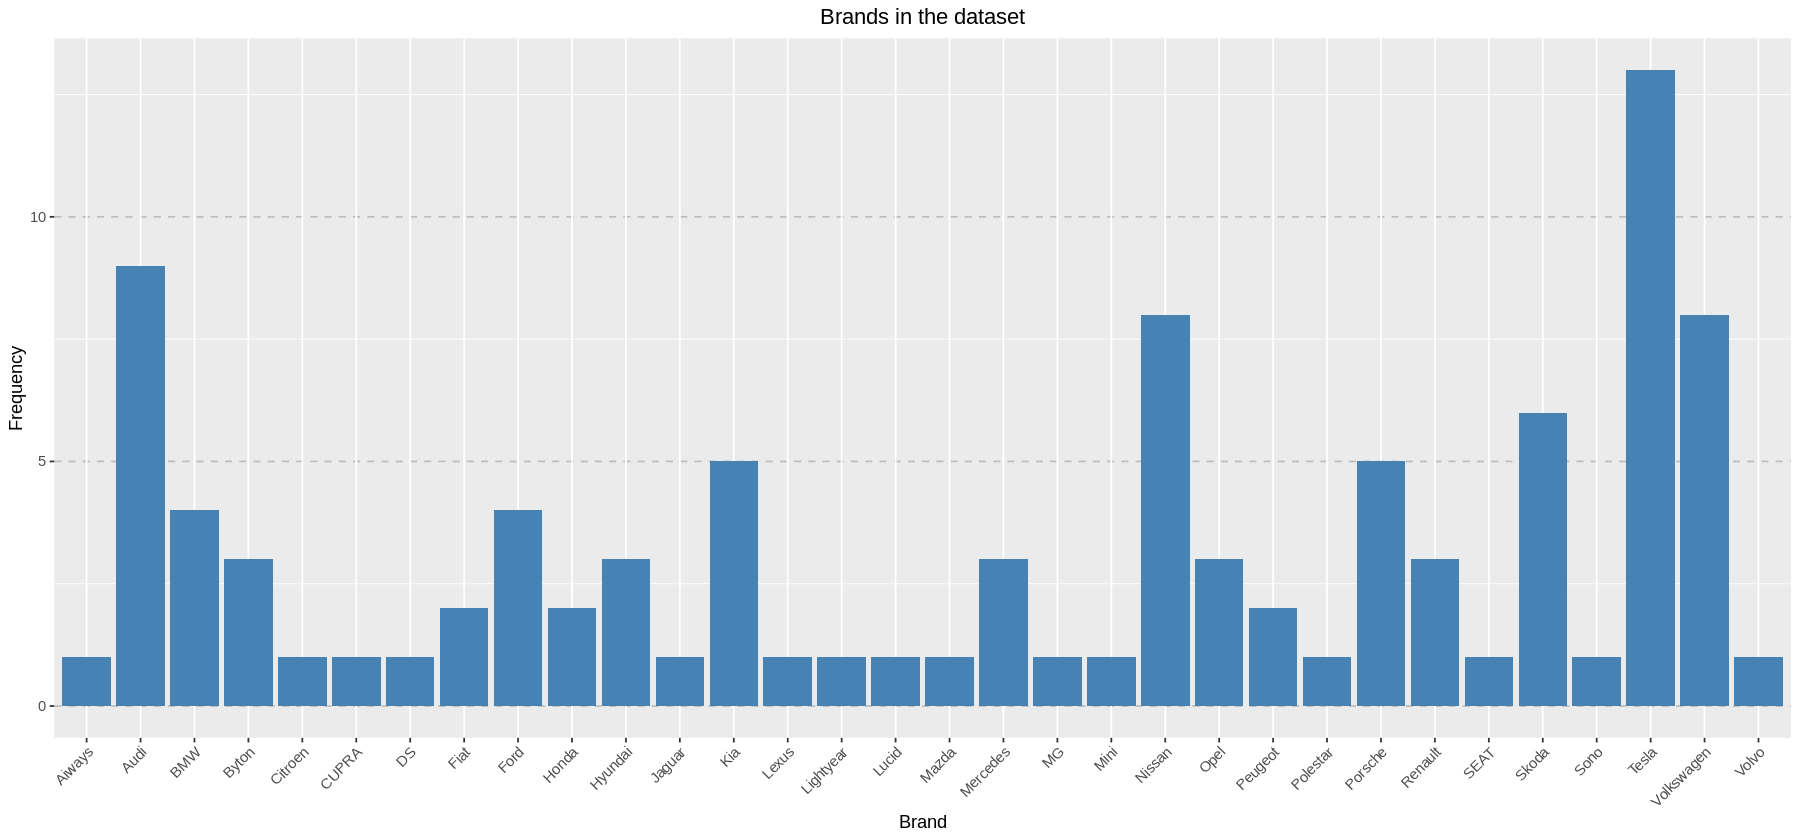

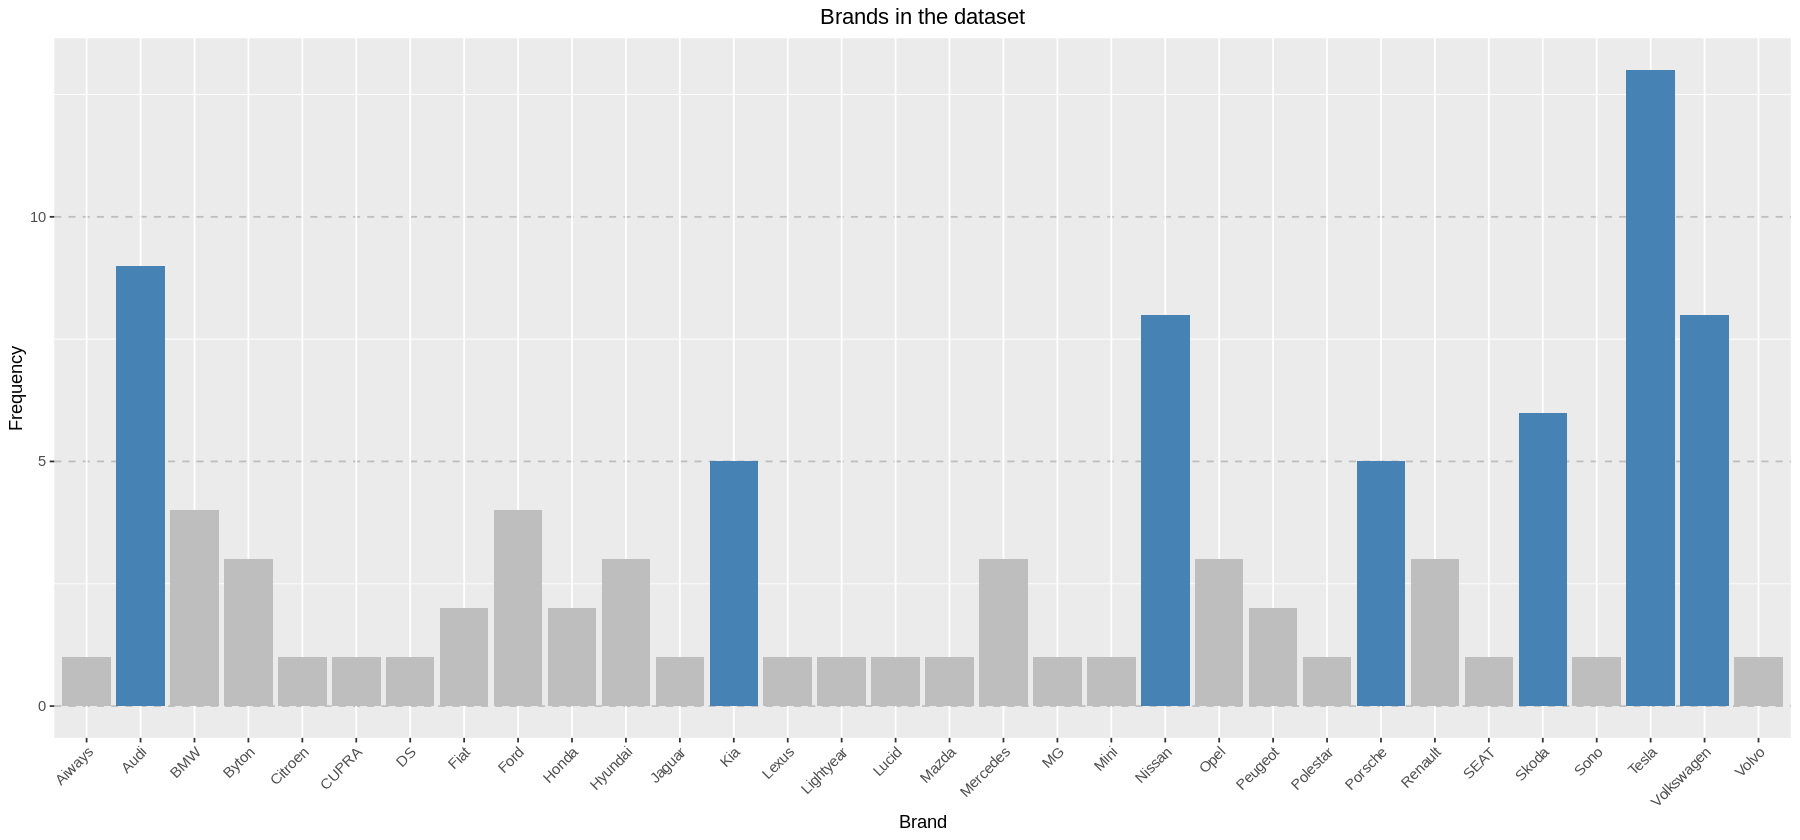

In [ ]:
# Calculate frequency of each brand
a <- table(data$Brand)

# Create a data frame with the frequency
df_freq <- data.frame(Brand = names(a), Frequency = as.numeric(a))

# Adjust the plot width
options(repr.plot.width = 15)

# Create a bar plot for Brands in the dataset
ggplot(df_freq, aes(x = Brand, y = Frequency)) + geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Brands in the dataset", x = "Brand", y = "Frequency") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

# Highlight
ggplot(df_freq, aes(x = Brand, y = Frequency)) +
  geom_bar(stat = "identity", fill = ifelse(df_freq$Frequency < 5, "grey", "steelblue")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Brands in the dataset", x = "Brand", y = "Frequency") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))




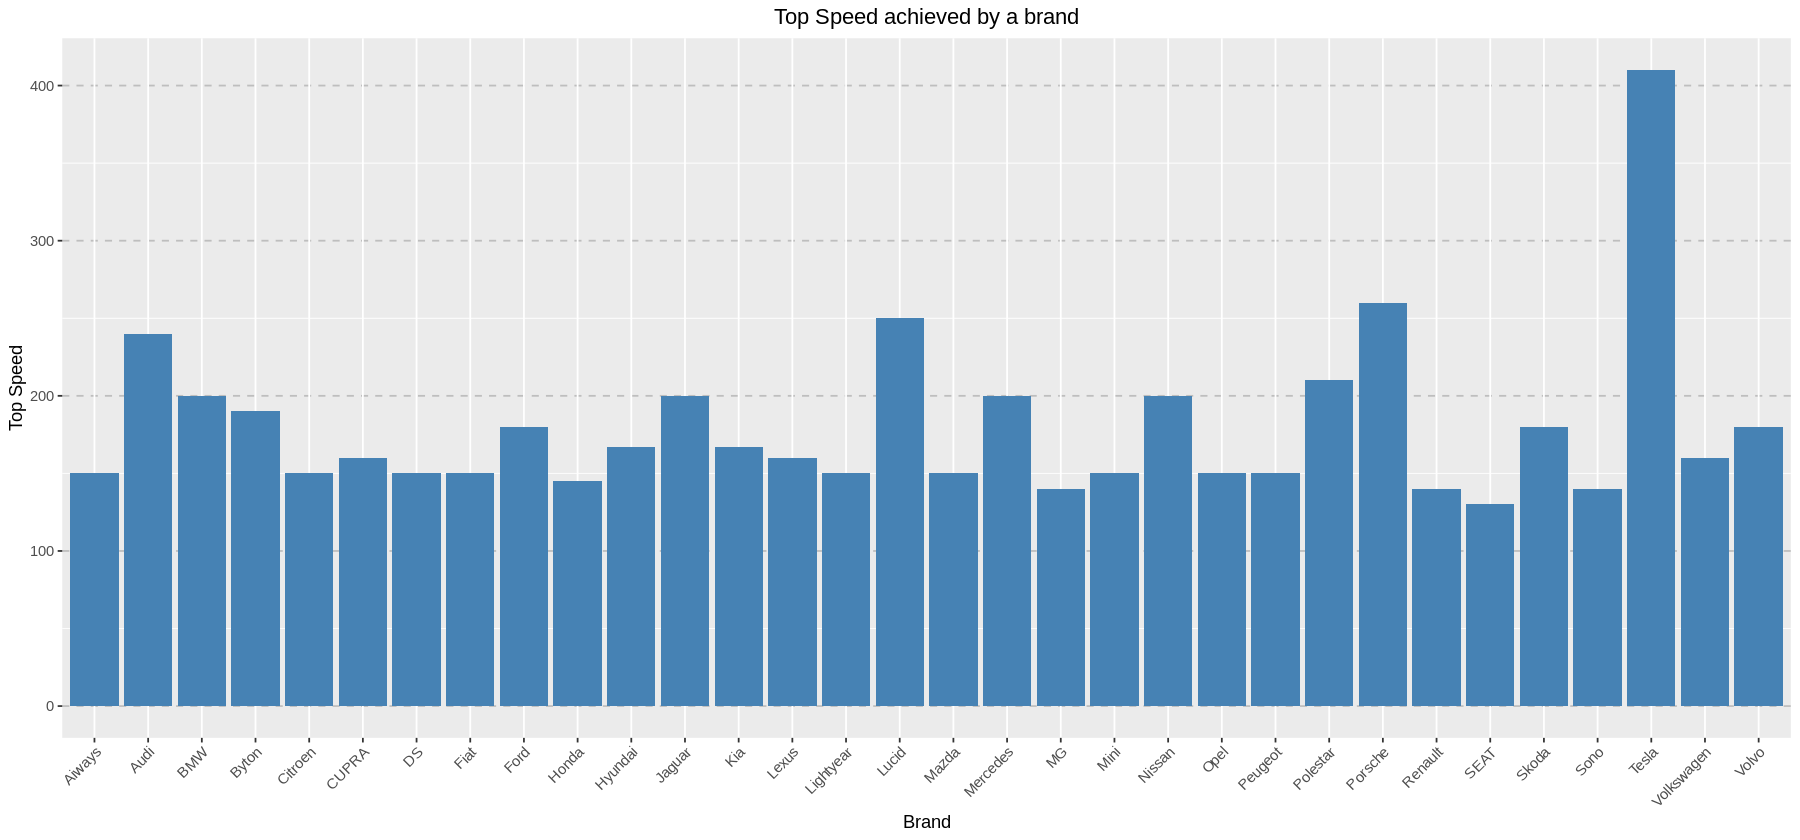

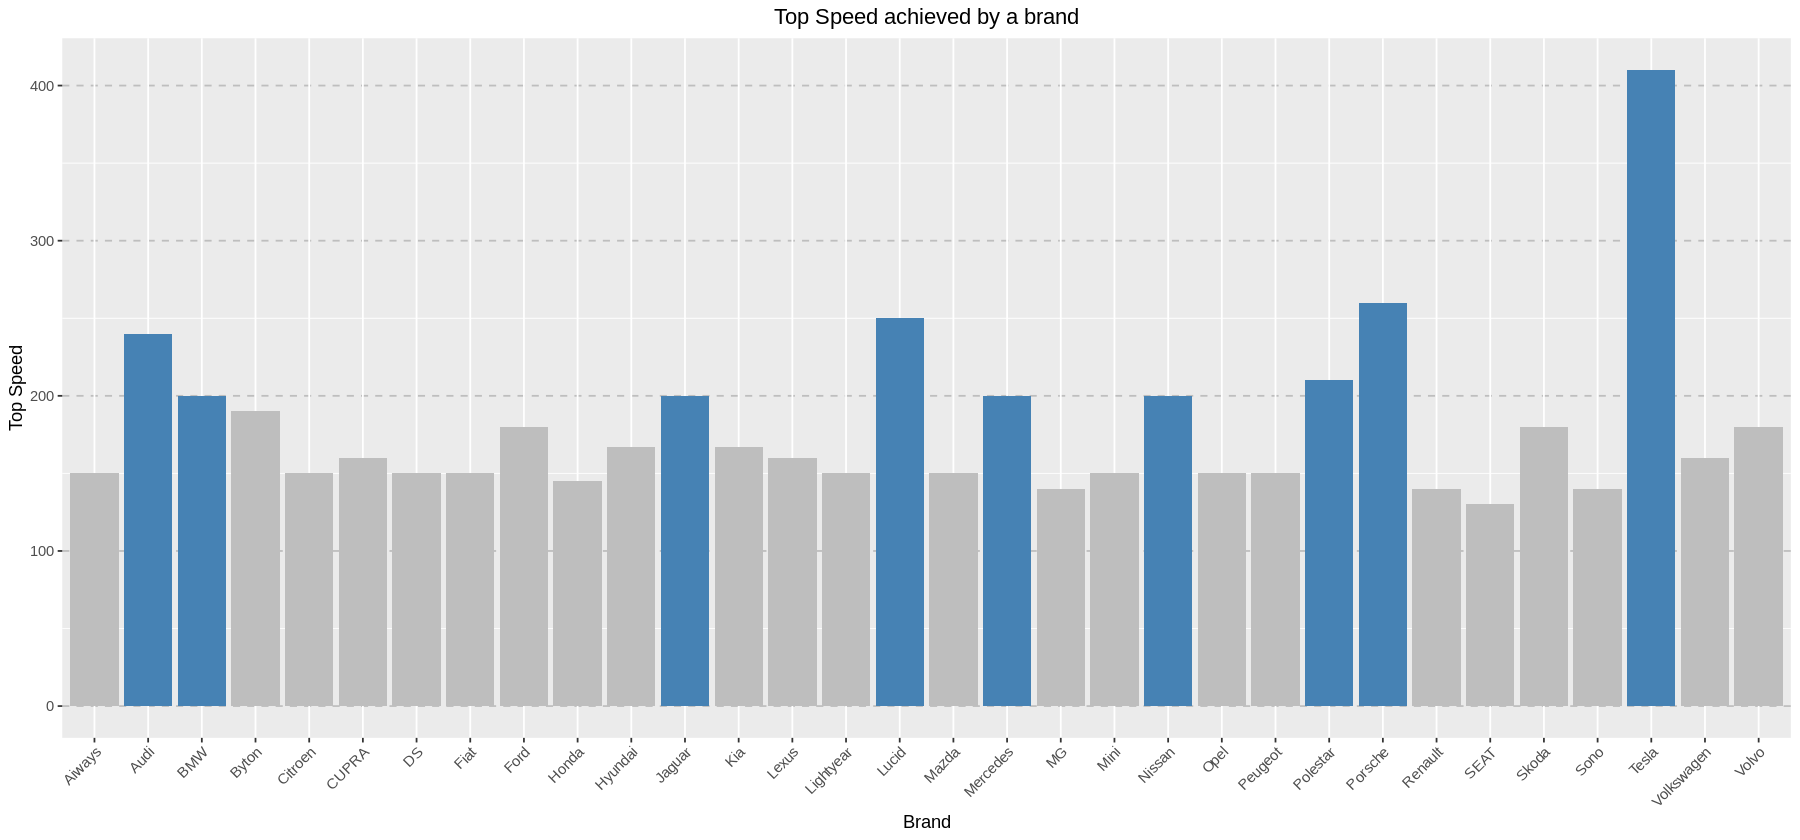

In [ ]:
# Summarize the data to retain only the maximum top speed for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(TopSpeed = max(TopSpeed))

# Adjust the plot width
options(repr.plot.width = 15)

# Create a bar plot with the maximum top speed for each brand
ggplot(summarized_data, aes(x = Brand, y = TopSpeed)) +
  geom_bar(stat = "identity", fill = "steelblue", position = "dodge") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Top Speed achieved by a brand", x = "Brand", y = "Top Speed") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

#Highlight
# Create a bar plot with the maximum top speed for each brand
ggplot(summarized_data, aes(x = Brand, y = TopSpeed)) +
  geom_bar(stat = "identity", fill = ifelse(summarized_data$TopSpeed < 200, "grey", "steelblue")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Top Speed achieved by a brand", x = "Brand", y = "Top Speed") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))


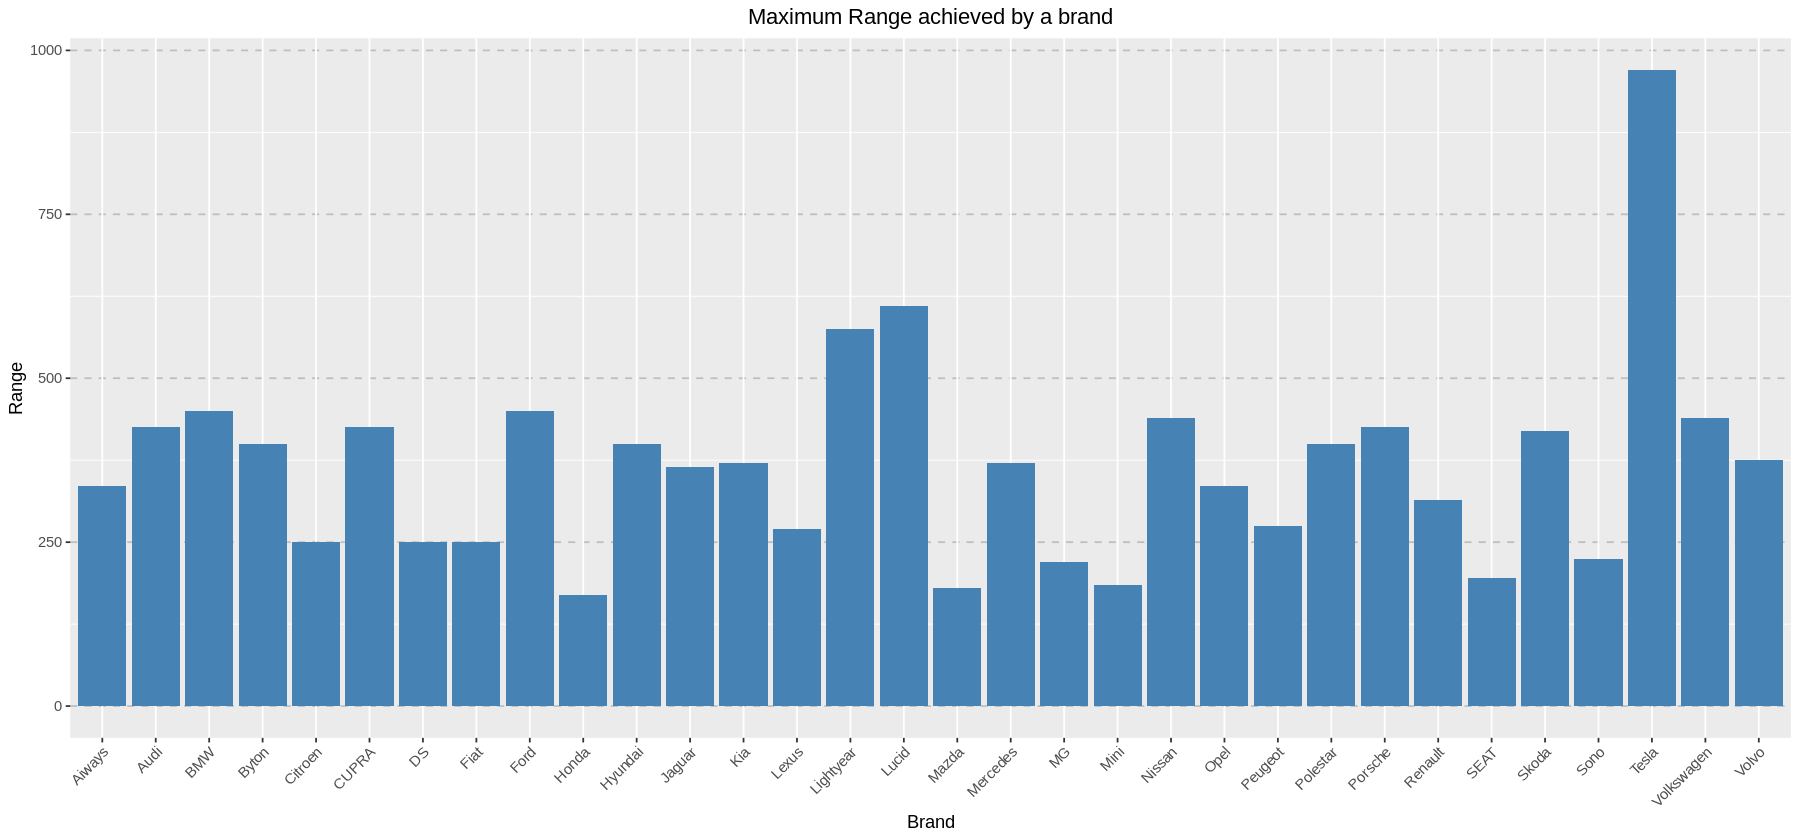

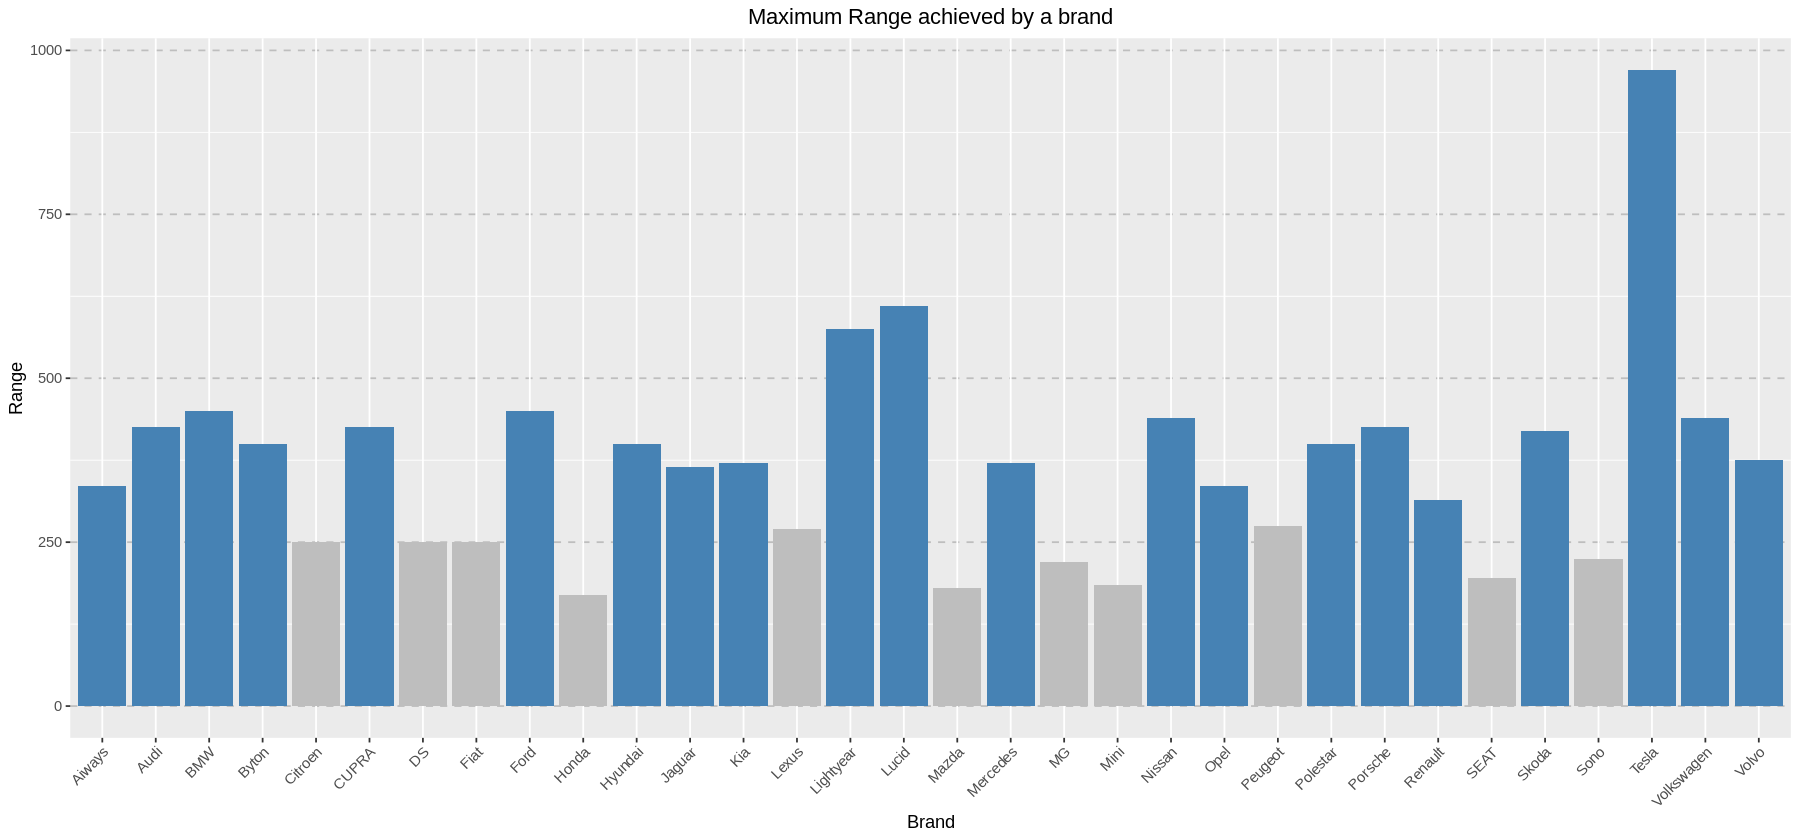

In [ ]:
# Summarize the data to retain only the maximum range for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(MaxRange = max(Range))

# Create a bar plot with the maximum range for each brand
ggplot(summarized_data, aes(x = Brand, y = MaxRange)) +
  geom_bar(stat = "identity", fill = "steelblue", position = "dodge") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Maximum Range achieved by a brand", x = "Brand", y = "Range") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

#Highlight
ggplot(summarized_data, aes(x = Brand, y = MaxRange)) +
   geom_bar(stat = "identity", fill = ifelse(summarized_data$MaxRange < 300, "grey", "steelblue")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Maximum Range achieved by a brand", x = "Brand", y = "Range") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))


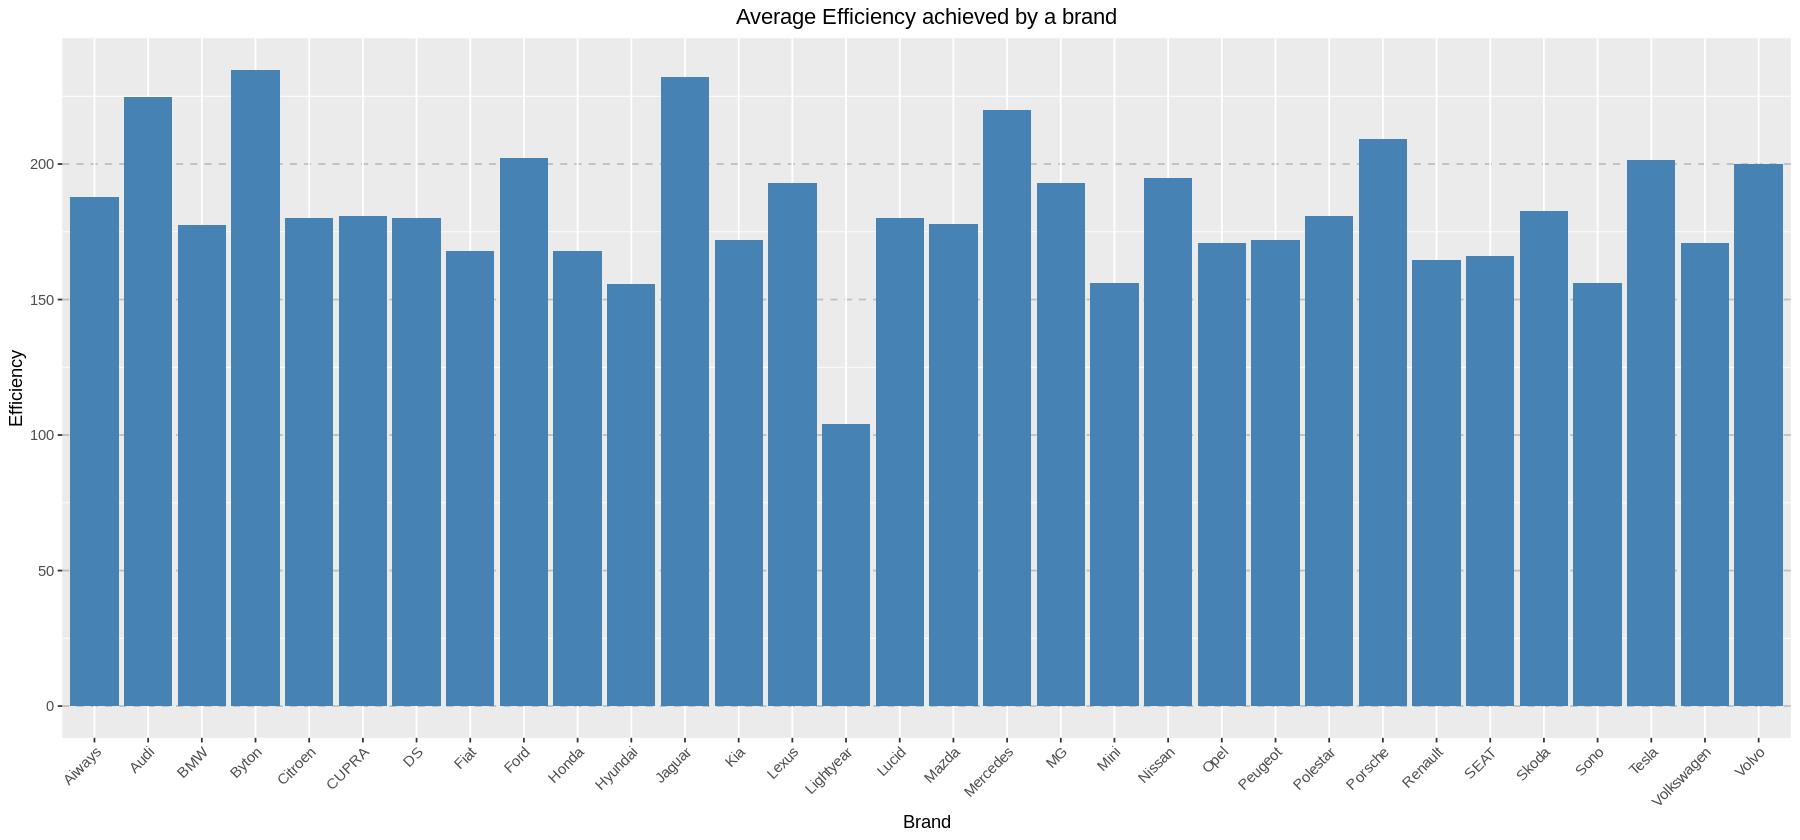

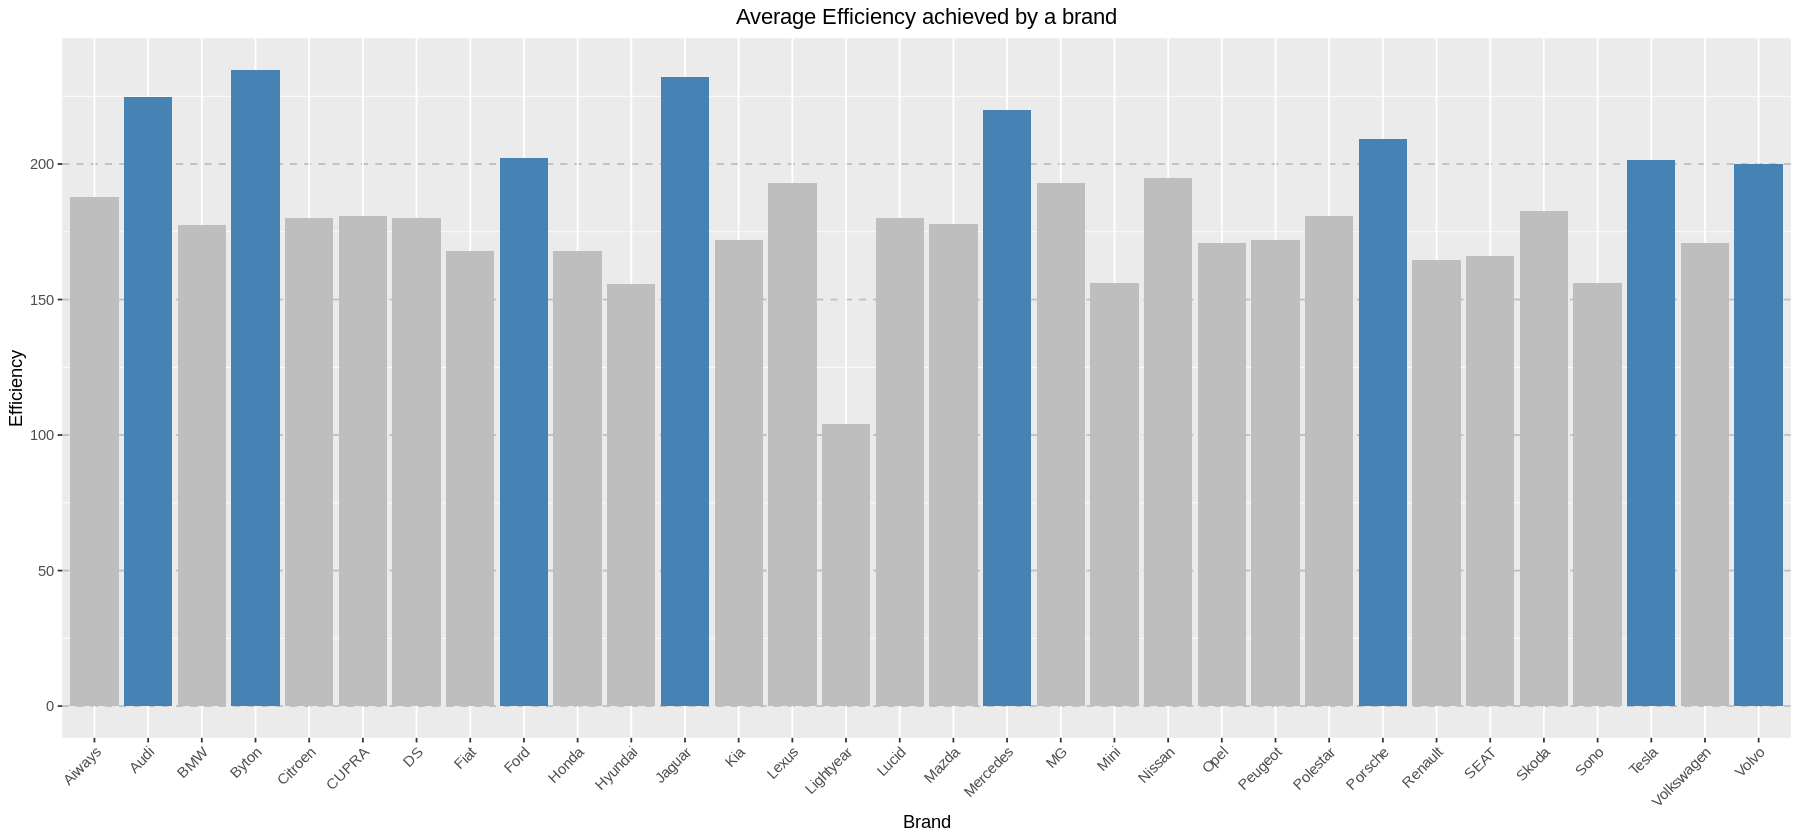

In [ ]:
# Summarize the data to retain only the average efficiency for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(AvgEfficiency = mean(Efficiency))

# Create a bar plot with the average efficiency for each brand
ggplot(summarized_data, aes(x = Brand, y = AvgEfficiency)) +
  geom_bar(stat = "identity", fill = "steelblue", position = "dodge") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Average Efficiency achieved by a brand", x = "Brand", y = "Efficiency") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

# Create a bar plot with the average efficiency for each brand ( Highlighted)
ggplot(summarized_data, aes(x = Brand, y = AvgEfficiency)) +
  geom_bar(stat = "identity", fill = ifelse(summarized_data$AvgEfficiency < 200, "grey", "steelblue")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Average Efficiency achieved by a brand", x = "Brand", y = "Efficiency") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

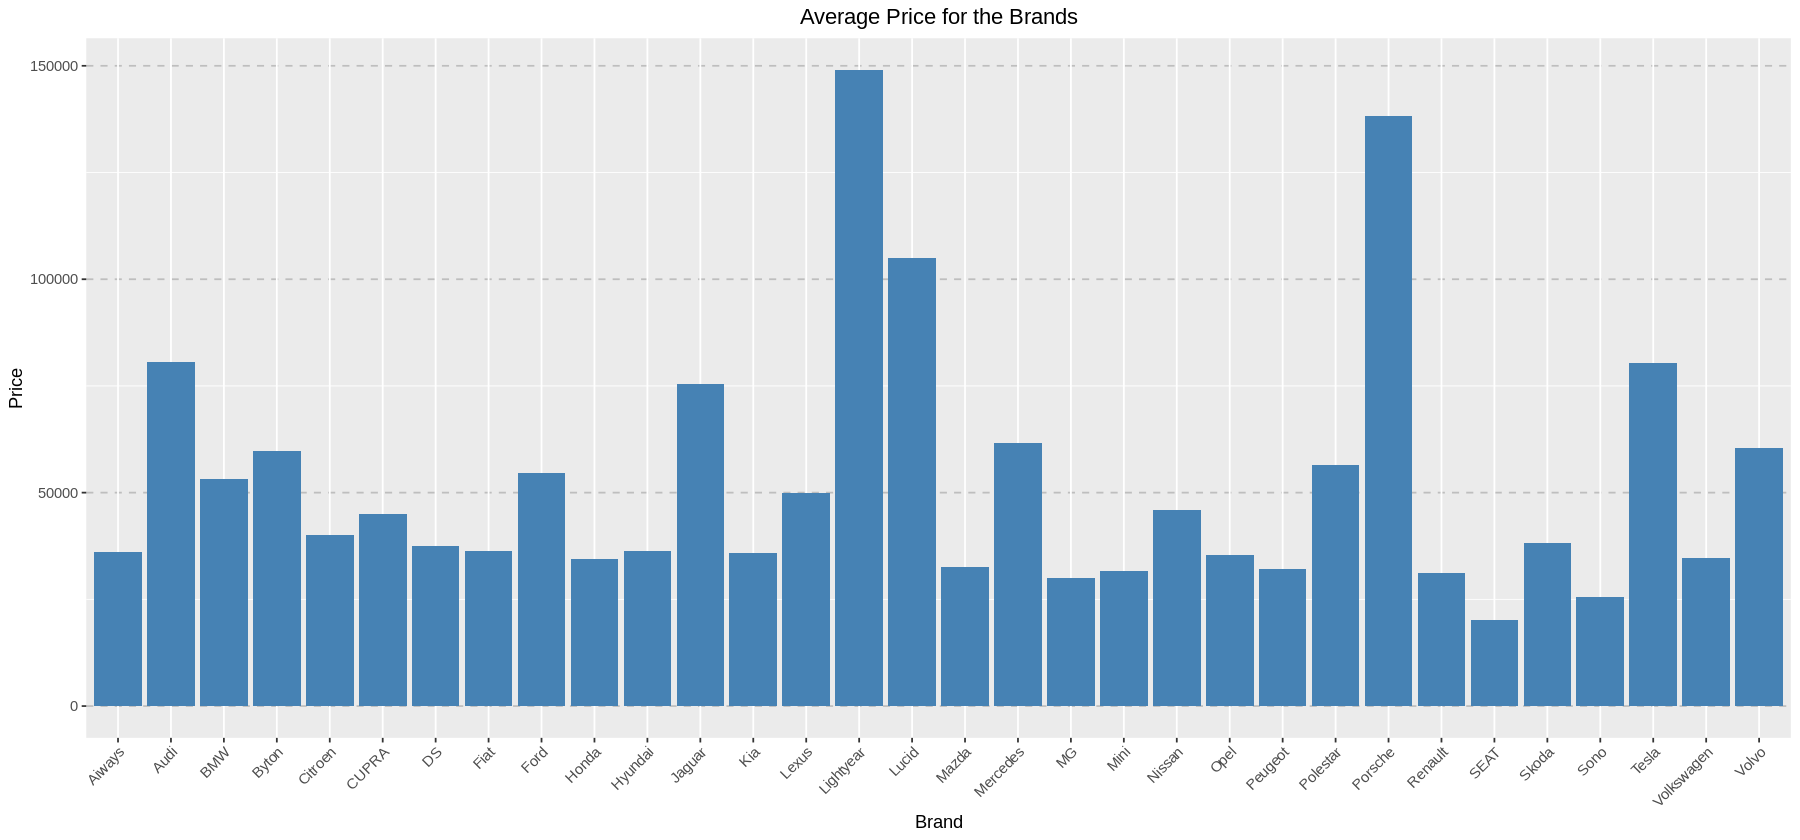

In [ ]:
# Summarize the data to retain only the average price for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(AvgPrice = mean(PriceEuro))

# Create a bar plot with the average price for each brand
ggplot(summarized_data, aes(x = Brand, y = AvgPrice)) +
  geom_bar(stat = "identity", fill = "steelblue", position = "dodge") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Average Price for the Brands", x = "Brand", y = "Price") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



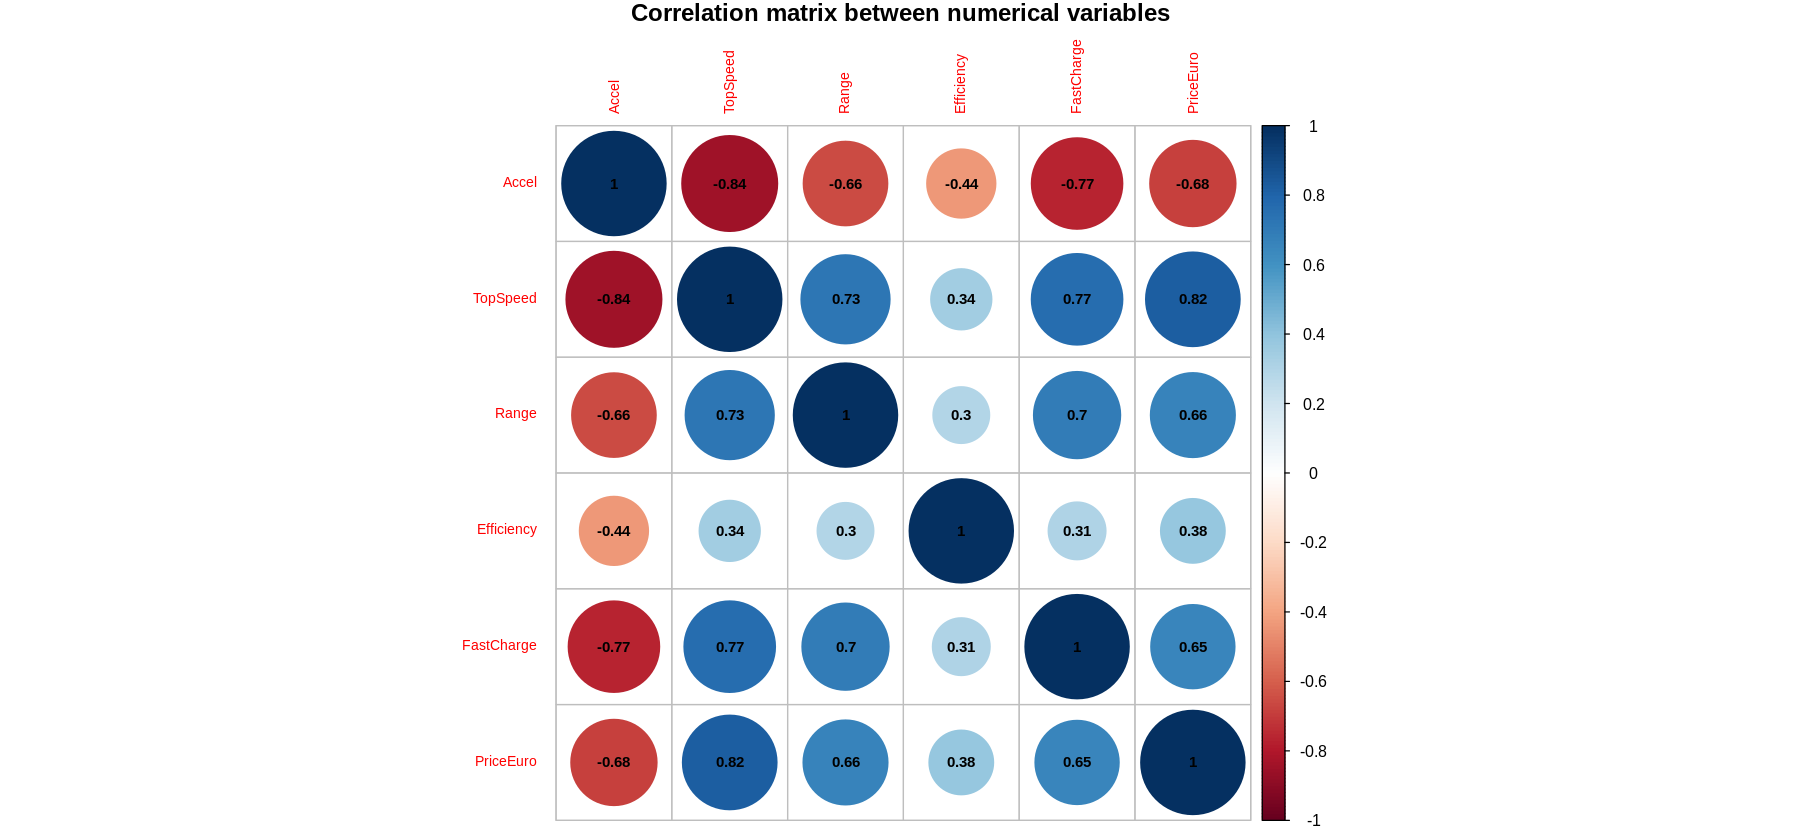

In [ ]:
# Correlation matrix for numerical variables
install.packages("corrplot")
library(corrplot)
cor_matrix <- cor(data[NUM_COL])
suppressMessages(library('corrplot'))
corrplot(cor_matrix, tl.cex = 0.7, addCoef.col="black", tl.offset=0.8, number.cex=0.75, mar=c(0,0,1,0), title='Correlation matrix between numerical variables')

In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the necessary packages
library(lmtest)

# Create the design matrix with predictors and add a constant column
x <- cbind(constant = 1, data[c('Accel', 'Range', 'TopSpeed', 'Efficiency', 'FastCharge')])

# Create the response variable
y <- data$PriceEuro

# Fit the linear regression model
model <- lm(y ~ ., data = x)

# Print the summary of the model
summary(model)



Call:
lm(formula = y ~ ., data = x)

Residuals:
   Min     1Q Median     3Q    Max 
-39903  -8768  -1013   4685 109799 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -111738.87   31235.53  -3.577 0.000556 ***
constant            NA         NA      NA       NA    
Accel          1904.37    1641.80   1.160 0.249080    
Range            36.46      25.55   1.427 0.156951    
TopSpeed        617.65      96.33   6.412 6.08e-09 ***
Efficiency      149.30      72.83   2.050 0.043228 *  
FastCharge        5.11      17.03   0.300 0.764823    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19300 on 92 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6832 
F-statistic: 42.83 on 5 and 92 DF,  p-value: < 2.2e-16


only TopSpeed and Efficiency are related to target variable PriceEuro because they have a low p-value (<0.05) , meaning that they have a strong positive relationship with PriceEuro




In [ ]:
install.packages("caTools")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the necessary packages
library(caTools)
library(caret)

# Set the random seed for reproducibility
set.seed(123)

# Select the desired features and target variable from the dataset
selected_features <- c("TopSpeed", "Efficiency")
target_variable <- "PriceEuro"
selected_data <- data[c(selected_features, target_variable)]

# Split the data into train and test sets
split <- sample.split(selected_data[[target_variable]], SplitRatio = 0.7)

# Create the training set
train_data <- subset(selected_data, split == TRUE)

# Create the test set
test_data <- subset(selected_data, split == FALSE)

# Build the linear regression model using the training data
model <- lm(formula = paste(target_variable, "~ ."), data = train_data)

# Make predictions on the test data
predictions <- predict(model, newdata = test_data)

# Evaluate the model
mse <- mean((predictions - test_data[[target_variable]])^2)  # Mean Squared Error
rmse <- sqrt(mse)  # Root Mean Squared Error
r2 <- cor(predictions, test_data[[target_variable]])^2  # R-squared

# Print the evaluation metrics
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared (R2):", r2, "\n")

Mean Squared Error (MSE): 174048114 
Root Mean Squared Error (RMSE): 13192.73 
R-squared (R2): 0.8356459 
